In [1]:
#1. import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [60]:
# loading Dataset
df = pd.read_csv('Olympic-medals-1976-to-2008.csv',encoding='ISO-8859-1')

In [61]:
# Check the first few rows of the dataset
print(df.head())

       City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze  


In [62]:
#Summary of the Dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB
None
               Year
count  15316.000000
mean    1993.620789
std       10.159851
min     1976.000000
25%     1984.000000
50%     1996.000000
75%     2004.000000
max     2008.000000


In [63]:
# Step 2: Data Cleaning
# Check  for missing values
print(df.isnull().sum())


City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64


In [64]:
# Drop rows with missing values if any
df_cleaned = df.dropna()
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB
None


In [65]:
#Step 3: Exploratory Data Analysis (EDA)
#3.1 Total Medal Count by Country

# Total medals won by each country
medals_by_country = df_cleaned.groupby('Country') ['Medal'].count().sort_values(ascending=False)

# Display the top 10 countries with the most medals
print(medals_by_country.head(10))


Country
United States     1992
Soviet Union      1021
Australia          798
Germany            691
China              679
Russia             638
East Germany       626
Italy              486
Romania            482
United Kingdom     467
Name: Medal, dtype: int64


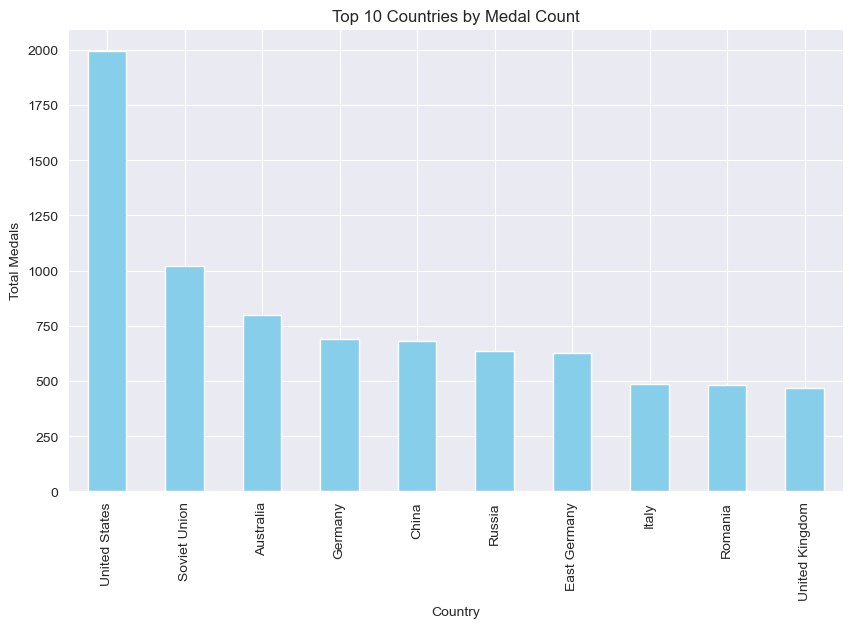

In [68]:
# Plotting the top 10 countries by medals
plt.figure(figsize=(10, 6))
medals_by_country.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Medal Count")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.show()

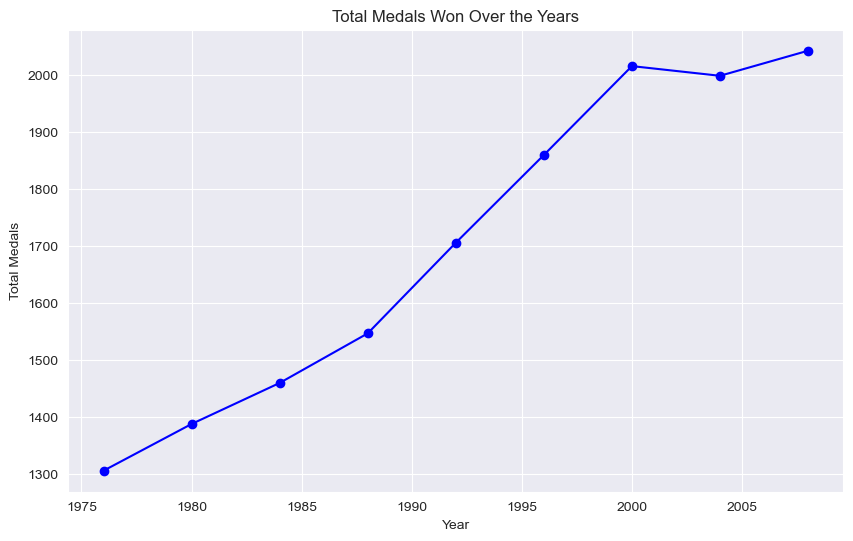

In [67]:
# 3.2 Medals Won Over the Years
# Grouping by year and counting the medal won

medals_over_years = df_cleaned.groupby('Year')['Medal'].count()

# Plotting the trend of medals won over the years
plt.figure(figsize=(10, 6))
plt.plot(medals_over_years.index, medals_over_years.values,marker='o' , linestyle='-' ,color ='b')
plt.title("Total Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()


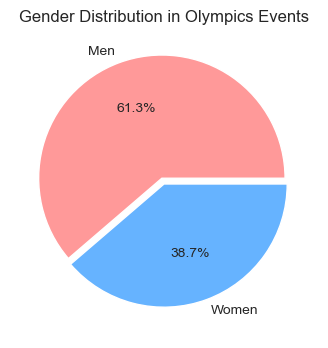

In [69]:
#3.3 Gender Distribution in
# Gender distribution in events

gender_distribution = df_cleaned['Gender'].value_counts()

# Plotting the gender distribution
plt.figure(figsize=(6,4))
gender_distribution.plot(kind='pie' ,autopct='%1.1f%%',colors=['#ff9999','#66b3ff'], explode=[0.05, 0])
plt.title("Gender Distribution in Olympics Events")
plt.ylabel("")
plt.show()

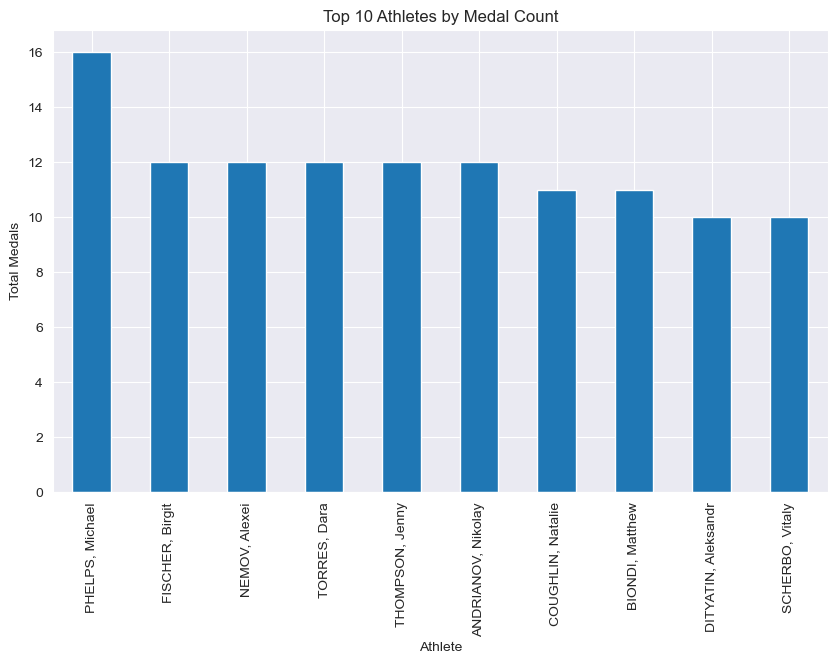

In [70]:
#3.4 Top Athletes with Most Medals
# Group by Athlete and count the number of medals
athlete_medal_count = df_cleaned.groupby('Athlete')['Medal'].count().sort_values(ascending=False)

# Plotting the top 10 athletes with most medals
plt.figure(figsize=(10, 6))
athlete_medal_count.head(10).plot(kind='bar')
plt.title("Top 10 Athletes by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")
plt.show()

In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Ensure df_cleaned is an independent copy
df_cleaned = df_cleaned.copy()

# Apply label encoding properly
df_cleaned.loc[:, 'Country_Code'] = le.fit_transform(df_cleaned['Country_Code'])
df_cleaned.loc[:, 'Sport'] = le.fit_transform(df_cleaned['Sport'])
df_cleaned.loc[:, 'Gender'] = le.fit_transform(df_cleaned['Gender'])
df_cleaned.loc[:, 'Event_gender'] = le.fit_transform(df_cleaned['Event_gender'])

# Map Medal column safely
df_cleaned.loc[:, 'Medal'] = df_cleaned['Medal'].map({'Gold': 2, 'Silver': 1, 'Bronze': 0}).fillna(-1)
# Encode categorical variables using LabelEncoder
le = LabelEncoder()
df_cleaned['Country_Code'] = le.fit_transform(df_cleaned['Country_Code'])
df_cleaned['Sport'] = le.fit_transform(df_cleaned['Sport'])
df_cleaned['Gender'] = le.fit_transform(df_cleaned['Gender'])
df_cleaned['Event_gender'] = le.fit_transform(df_cleaned['Event_gender'])

# Encode target variable (Medal) and handle missing values
df_cleaned['Medal'] = df_cleaned['Medal'].map({'Gold': 2, 'Silver': 1, 'Bronze': 0}).fillna(-1)

# Display class distribution before split
print("Class distribution before split:\n", df_cleaned['Medal'].value_counts())

# Define categorical and numerical features
categorical_features = ['Country_Code', 'Event_gender']
numerical_features = ['Age', 'Height', 'Weight']

# Handle missing values for numerical features
if all(col in df_cleaned.columns for col in numerical_features):
    df_cleaned[numerical_features] = df_cleaned[numerical_features].fillna(df_cleaned[numerical_features].median())
    scaler = StandardScaler()
    X_numerical = scaler.fit_transform(df_cleaned[numerical_features])
else:
    X_numerical = np.empty((df_cleaned.shape[0], 0))  # Empty array if no numerical features

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(df_cleaned[categorical_features])

# Combine numerical and categorical features
X = np.hstack((X_numerical, X_encoded))
y = df_cleaned['Medal']

# Check class distribution before splitting
print("Class distribution before split:\n", df_cleaned['Medal'].value_counts())

# Split dataset (try reducing test_size if needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution in training set
print("Class distribution in training set:\n", pd.Series(y_train).value_counts())

# ✅ Apply SMOTE only if y_train has more than 1 class
if len(np.unique(y_train)) > 1:
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Train logistic regression
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)

    # Predictions & Evaluation
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

else:
    print("Error: y_train contains only one class. Adjust dataset splitting.")


Class distribution before split:
 Medal
-1.0    15316
Name: count, dtype: int64
Class distribution before split:
 Medal
-1.0    15316
Name: count, dtype: int64
Class distribution in training set:
 Medal
-1.0    12252
Name: count, dtype: int64
Error: y_train contains only one class. Adjust dataset splitting.
